The tool [*scBoolSeq*](https://github.com/bnediction/scBoolSeq) can be used to generated synthetic scRNA-Seq datasets from Boolean traces obtained by the simulation of Boolean networks.

The synthetic scRNA-Seq are sampled from pseudocount distributions learnt by *scBoolSeq* from a reference scRNA-Seq dataset.

In this notebook, we demonstrate how to generate such a synthetic dataset from a simple artificial Boolean networks.

In [1]:
from scboolseq import scBoolSeq
import pandas as pd
from colomoto import minibn

import warnings  # silence some warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

This notebook has been executed using the docker image `colomoto/colomoto-docker:local`

In [2]:
# fix seeds
import random
import numpy as np
_rng_seed = 19834650
_rng = np.random.default_rng(_rng_seed)
random.seed(_rng_seed)

**1. Learning of reference pseudocount distributions**

*scBoolSeq* learns pseudocount distributions from highly-variables genes of a reference scRNA-Seq dataset.

In [3]:
!test -f GSE81682_Hematopoiesis.csv || curl -fOL \
    https://github.com/bnediction/scBoolSeq-supplementary/raw/main/data_filtered_vargenes/GSE81682_Hematopoiesis.csv

In [4]:
ref_data = pd.read_csv("GSE81682_Hematopoiesis.csv", index_col=0)
# for the sake of the demo, we shrink the number of genes
ref_data = ref_data.iloc[:,:256]
ref_data

,8430408G22Rik,Plp1,Zfp947,Bhlhb9,Vps35,Slc18a1,Fam107b,Gm14230,Plekhn1,Ankrd6,9030619P08Rik,Prtn3,Lrrn4,Mrgpre,Gm25926,Plppr3,Memo1,Cdkn1c,Gm2a,Phxr4,B2m,Tbxas1,Glipr2,Tcf15,Trim58,D930028M14Rik,1700010I14Rik,Gm10384,Sla2,Trp53i13,Gm17586,Gypc,Clic5,Tubb4b,AC149090.1,Gm26580,Clec1a,Ccl9,Gimap3,Zscan18,Spi1,Ccl6,2900041M22Rik,Klk8,Gm37637,Gp9,Idh3a,Akr1c13,2810408A11Rik,Npr2,Ephx1,Pik3ip1,ENSMUSG00000043858,Gm26789,Grina,Txnip,Gm26541,Dnajb3,Msn,Gm37124,Srd5a1,Bhlhe40,Pomgnt2,Fcer1g,Gm37298,Lmo1,Rab20,Cd69,Gm2788,Gm14276,Napa,Cd24a,Nsun2,Marveld2,Ms4a4b,Gm17590,Cdk6,Tada2b,Gm5113,Mki67,Btg2,Gnat2,Tcaf1,Slc35e4,Reep2,8430419K02Rik,Pdgfd,H2-K1,Sesn1,Bcap29,Gm21814,Eif5a,Stk25,Maged1,Zfp449,9130604C24Rik,6430590A07Rik,Tcirg1,Il4,Slc35a4,Cysltr2,Ap3m2,Dsel,Cmtm7,Arl8b,Gbx2,Smim10l2a,Cyth4,S1pr4,Gdi1,Hdhd3,Vill,Slc38a6,Calu,Gm16565,Smim3,Sar1a,4833407H14Rik,B230217O12Rik,Ccdc39,Spata2l,Arxes2,Dut,Ifngr1,Rasa3,Fbxl2,Pde4b,Ptp4a3,Cdt1,Fxyd1,Arl11,Shisa8,Dleu7,Tmem173,Atxn10,Rpn2,Ccl3,Nudt16,Kif3c,Hars,Ccl4,Myo1g,Cpq,Cox6a2,Sdc3,Dok2,Fcgrt,Elmo1,Cyc1,Calr,Gpr18,Tbxa2r,Gpr183,Naaa,Gm11110,Alad,Taz,Echdc3,Cd300a,Slc39a4,Zfp128,Gm26819,Ispd,Itm2b,Zfp647,Gm16861,Nek3,Gata2,Prss16,Lppos,Lhcgr,Fundc1,Lat,Tnfrsf26,Prr36,Vldlr,Mfge8,Enkur,Rcor2,Ndn,Btla,Zyx,Cd33,Dkc1,Rab37,Cdcp1,Hoxa9,Oat,Vegfc,Gas6,Oasl2,Tacc1,Colgalt1,Xdh,Rab32,Dusp2,Tmem176a,Gnai3,Rnf13,Elane,Cd48,Mthfd1,Igkc,Fnta,Bok,Ripply3,Ptger2,P2rx7,Wdfy2,Eif1a,Gstm7,Tmem14c,2900018N21Rik,Mpl,Sash3,Tgm2,Gm19569,Ehd3,Cish,Calml4,Mesdc2,Nfil3,Tcn2,Saraf,Meis1,Serpina3g,Pcx,Gpr171,Cks1b,Coa5,Arhgap27os3,Farsa,Ctsl,Iigp1,P2ry14,Cd82,Slc18a2,Cd302,Parp12,Isyna1,S100a8,B130034C11Rik,Arhgap27,Klf1,Gm26740,Cd84,Bag2,Tmem123,Emilin1,4930568A12Rik,Clec11a,Mat2a,Tespa1,Wfdc17,Tspan13,Dyrk2
HSPC_025,0.0,0.000000,0.000000,5.392129,8.852337,0.000000,2.614548,0.000000,0.000000,0.0,6.711045,7.977803,8.117451,0.000000,0.000000,8.195180,7.977803,0.000000,9.173640,0.0,12.912375,8.427644,7.839405,0.0,1.189716,0.0,0.000000,0.000000,0.000000,5.935712,0.000000,8.021134,0.000000,7.309000,10.293674,0.000000,0.000000,2.275971,0.000000,0.0,9.014787,0.000000,0.000000,0.000000,0.000000,1.832751,8.774285,1.189716,1.189716,1.832751,0.0,3.118770,7.285499,0.000000,7.135838,8.744431,0.000000,0.0,8.852337,0.0,0.000000,0.0,1.832751,1.189716,0.000000,0.000000,0.000000,1.189716,0.000000,0.000000,7.225016,8.876132,7.940672,6.184685,1.189716,0.000000,8.691769,1.189716,0.000000,3.491677,7.161885,0.000000,0.00000,0.000000,1.832751,6.779938,8.490658,11.925211,7.410259,3.317239,0.000000,10.416407,4.242991,2.275971,1.832751,1.189716,0.000000,7.894815,0.000000,9.681046,1.189716,0.000000,0.0,9.723202,4.141925,0.000000,0.000000,7.574401,7.174734,2.275971,0.000000,2.614548,0.000000,2.888576,0.000000,7.806760,8.268934,3.491677,0.000000,0.000000,0.000000,0.000000,8.585122,2.888576,2.614548,0.000000,8.344797,6.461289,7.285499,0.000000,7.593666,6.657127,0.0,2.275971,8.655561,9.077708,0.000000,1.832751,1.189716,7.695253,10.437884,1.832751,7.814991,0.000000,0.0000,1.189716,5.935712,4.588530,2.275971,9.025466,0.000000,1.189716,0.000000,0.000000,0.000000,3.118771,1.189716,1.189716,7.161885,0.0,0.000000,0.000000,0.000000,10.103505,0.000000,0.000000,0.000000,2.888576,0.000000,0.00000,0.000000,7.977803,6.675324,0.000000,0.000000,7.054751,0.000000,0.000000,0.0,0.000000,0.000000,9.101455,7.040782,9.449536,0.000000,0.000000,8.310278,8.495788,0.000000,0.000000,2.888576,8.687292,7.940672,0.000000,1.189716,11.307754,7.781782,7.894815,8.361752,0.000000,2.888576,9.067410,4.509590,8.310278,0.0,0.000000,0.000000,0.000000,0.000000,7.343549,0.000000,5.671352,7.564672,10.551846,6.763021,0.000000,1.189716,0.000000,0.000000,1.189716,9.272583,0.000000,1.189716,8.021134,8.150349,2.275971,0.000000,7.747791,8.130700,3.647281,0.000000,7.593666,1.832751,1.189716,7.790156,7.421084,0.000000,0.000000,6.779938,2.275971,6.079295,0.000000,2.275971,2.888576,0.000000,9.014787,1.189716,8.182512,7.977803,4.141925,1.189716,9.826553,0.000000,9.822478,8.594715,0.000000
HSPC_0

In [5]:
%time scbool = scBoolSeq().fit(ref_data)

Computing bimodality index for 110/256 genes
Computing bimodality index for 178/256 genes
CPU times: user 7.48 s, sys: 566 ms, total: 8.05 s
Wall time: 2.37 s


**2. Generate Boolean dynamics**

We use `minibn` to define a simple Boolean network and generate a trajectory from it: it consists of a transcription factor which progressively activates its target genes.

# computing graph layout...


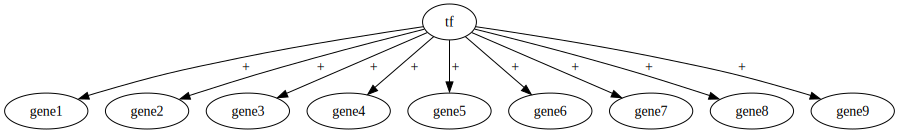

In [6]:
bn = minibn.BooleanNetwork({
    "tf": 1,
    "gene1": "tf",
    "gene2": "tf",
    "gene3": "tf",
    "gene4": "tf",
    "gene5": "tf",
    "gene6": "tf",
    "gene7": "tf",
    "gene8": "tf",
    "gene9": "tf"})
bn.influence_graph()

In [7]:
dynamics = minibn.FullyAsynchronousDynamics(bn)
## initial state: all inactive but tf
x0 = bn.zero()
x0["tf"] = 1
boolean_trace = pd.DataFrame(dynamics.random_walk(x0, steps=10))
boolean_trace

,tf,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0
2,1,1,0,0,0,0,0,0,1,0
3,1,1,1,0,0,0,0,0,1,0
4,1,1,1,0,0,0,1,0,1,0
5,1,1,1,0,0,0,1,0,1,1
6,1,1,1,0,1,0,1,0,1,1
7,1,1,1,1,1,0,1,0,1,1
8,1,1,1,1,1,0,1,1,1,1
9,1,1,1,1,1,1,1,1,1,1


**3. Synthetic scRNA-Seq generation**

In [8]:
# we generate 100 samples per state
counts = scbool.sample_counts(boolean_trace, n_samples_per_state=100, random_state=_rng_seed)
counts

/opt/conda/lib/python3.11/site-packages/scboolseq/simulation.py:860: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  "Skewness": ss.skew(trajectory),
/opt/conda/lib/python3.11/site-packages/scboolseq/simulation.py:861: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  "Kurtosis": ss.kurtosis(trajectory),


,tf,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9
0,11.807442,7.296882,6.235518,0.000000,3.728489,0.896689,0.000000,6.250985,6.451066,1.153216
1,11.270470,4.335632,2.941213,0.653300,4.193471,0.000000,2.051246,1.048464,12.188739,6.098412
2,11.383729,7.862695,4.459277,2.425311,1.572160,2.859352,2.684933,2.776694,9.660892,1.364609
3,11.686200,10.243716,9.310534,1.695683,1.370511,0.000000,2.500247,0.000000,10.594029,4.670935
4,10.611847,11.699445,8.944868,0.980907,3.065523,0.000000,6.912807,2.933879,9.442035,2.975051
...,...,...,...,...,...,...,...,...,...,...
5,10.876741,9.272842,8.043451,4.620983,2.135445,2.915461,8.686909,0.000000,10.339349,9.306314
6,11.564131,9.671571,9.264861,2.757219,9.044113,0.000000,8.765493,0.000000,9.170733,10.002612
7,11.148507,9.768933,10.220935,7.695293,8.396265,0.000000,8.400632,0.860203,9.423705,9.375922
8,11.523779,8.637396,6.470778,6.676360,9.036786,2.761117,7.102186,0.000000,12.792020,10.234925


Export to CSV with custom cell ID for each row:

In [9]:
cells = [f"step{x}_{y}"  for y in range(100) for x in boolean_trace.index]
export = counts.set_index(pd.Index(cells, name="CellId"))
export.to_csv("synthetic_scrnaseq.csv")

**4. Visualization** 

We use `scikit-learn` to project the generated scRNA-Seq dataset and visualize the proximity of cells depending on the number of active genes.

In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.manifold import LocallyLinearEmbedding, SpectralEmbedding

Perform projection:

In [11]:
vis_pipeline = Pipeline([
    ('pca', PCA()),
    ('subset_pca', FunctionTransformer(lambda x: x.iloc[:, :4])),
    ('lle', LocallyLinearEmbedding(n_neighbors=40, n_components=2, random_state=_rng_seed)),
])
_pre_vis = vis_pipeline.fit_transform(counts)

Attach labels to cells from ground-truth Boolean states, and plot the cells in projected 2D space:

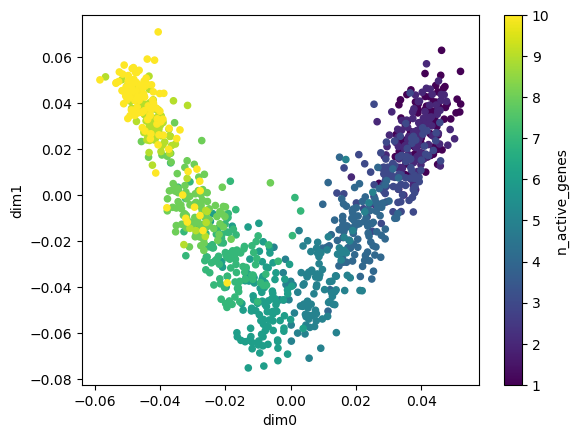

In [12]:
labels = boolean_trace.sum(axis=1)
labels.name = "n_active_genes"
vis_frame = _pre_vis.join(labels).reset_index(drop=True)
vis_frame.columns = ["dim0", "dim1", "n_active_genes"]
vis_frame.plot.scatter(x="dim0", y="dim1", c="n_active_genes", colormap="viridis");